In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from matplotlib.colors import ListedColormap

def plot_separating_surface(X, y, cls, title=''):
    x_min = min(X[:, 0]) - 0.1
    x_max = max(X[:, 0]) + 0.1
    y_min = min(X[:, 1]) - 0.1
    y_max = max(X[:, 1]) + 0.1
    h = min(x_max - x_min, y_max - y_min) / 1000
    cm = plt.cm.RdYlBu
    cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(10, 10))
    if title:
        plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=40, cmap=cm_bright)
    Z = Z.reshape(xx.shape)
    plt.xticks(())
    plt.yticks(())
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.3)
    plt.show()

In [3]:
n = 1000

X1 = np.c_[np.random.uniform(size=n) * 0.7 - 1, np.random.uniform(size=n) * 1.25 - 0.25]
y1 = np.zeros(X1.shape[0])

X2 = np.c_[np.random.uniform(size=n) * 1.3 - 0.3, np.random.uniform(size=n) * 1.25 - 0.25]
y2 = np.ones(X2.shape[0])

X3 = np.c_[np.random.uniform(size=2*n) * 2 - 1, np.random.uniform(size=2*n) * 0.75 - 1]
y3 = np.ones(X3.shape[0]) * 2

In [4]:
X = np.vstack((X1, X2, X3))
y = np.hstack((y1, y2, y3))

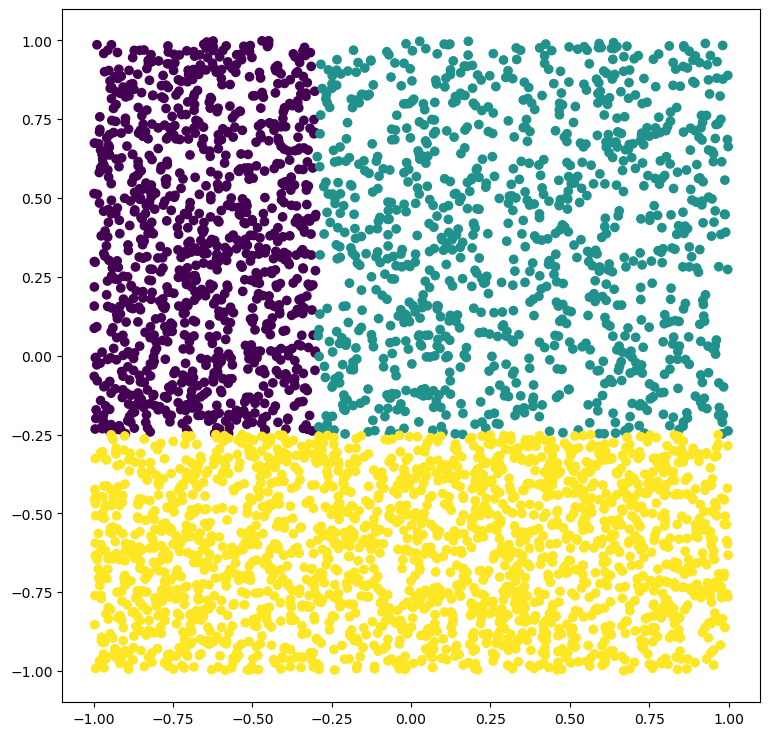

In [5]:
plt.figure(figsize=(9, 9))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [21]:
def compute_gini(X, y, ftr, thr): #ftr - номер признака, thr - 
    cnt_satisfy_class0 = ((y == 0) * (X[:, ftr] <= thr)).sum()
    cnt_satisfy_class1 = ((y == 1) * (X[:, ftr] <= thr)).sum()
    cnt_satisfy_class2 = ((y == 2) * (X[:, ftr] <= thr)).sum()
    
    cnt_dissatisfy_class0 = ((y == 0) * (X[:, ftr] > thr)).sum()
    cnt_dissatisfy_class1 = ((y == 1) * (X[:, ftr] > thr)).sum()
    cnt_dissatisfy_class2 = ((y == 2) * (X[:, ftr] > thr)).sum()
    
    cnt_satisfy = cnt_satisfy_class0 + cnt_satisfy_class1 + cnt_satisfy_class2
    cnt_dissatisfy = cnt_dissatisfy_class0 + cnt_dissatisfy_class1 + cnt_dissatisfy_class2
    
    cnt_total = cnt_satisfy + cnt_dissatisfy
    
    p0_satisfy = cnt_satisfy_class0 / cnt_satisfy
    p1_satisfy = cnt_satisfy_class1 / cnt_satisfy
    p2_satisfy = cnt_satisfy_class2 / cnt_satisfy
    
    p0_dissatisfy = cnt_dissatisfy_class0 / cnt_dissatisfy
    p1_dissatisfy = cnt_dissatisfy_class1 / cnt_dissatisfy
    p2_dissatisfy = cnt_dissatisfy_class2 / cnt_dissatisfy
    
    gini_satisfy = 1 - p0_satisfy**2 - p1_satisfy**2 - p2_satisfy**2
    gini_dissatisfy = 1 - p0_dissatisfy**2 - p1_dissatisfy**2 - p2_dissatisfy**2
    
    gini_index = cnt_satisfy / cnt_total * gini_satisfy + cnt_dissatisfy / cnt_total * gini_dissatisfy
    
    return gini_index

In [30]:
from tqdm.notebook import tqdm

x0_thr = np.linspace(-1, 1, 10**4)

gini_x0 = []
for thr in x0_thr:
    gini_x0.append(compute_gini(X, y, 0, thr))
gini_x0 = np.array(gini_x0)

C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:15: RuntimeWarning: invalid value encountered in long_scalars
  p0_satisfy = cnt_satisfy_class0 / cnt_satisfy
C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:16: RuntimeWarning: invalid value encountered in long_scalars
  p1_satisfy = cnt_satisfy_class1 / cnt_satisfy
C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:17: RuntimeWarning: invalid value encountered in long_scalars
  p2_satisfy = cnt_satisfy_class2 / cnt_satisfy
C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:19: RuntimeWarning: invalid value encountered in long_scalars
  p0_dissatisfy = cnt_dissatisfy_class0 / cnt_dissatisfy
C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:20: RuntimeWarning: invalid value encountered in long_scalars
  p1_dissatisfy = cnt_dissatisfy_class1 / cnt_dissatisfy
C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:21: RuntimeWarning: invalid value encounte

In [31]:
gini_x0[gini_x0 != gini_x0] = np.max(gini_x0[gini_x0 == gini_x0])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

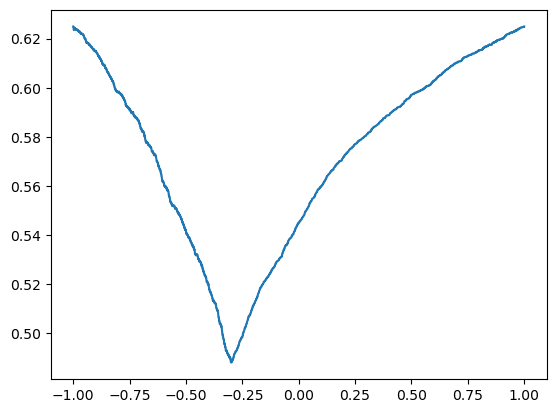

In [32]:
plt.plot(x0_thr, gini_x0)
plt.plot

In [36]:
x0_thr[np.argmin(gini_x0)]

-0.30013001300130016

In [33]:
x1_thr = np.linspace(-1, 1, 10**4)

gini_x1 = []
for thr in x0_thr:
    gini_x1.append(compute_gini(X, y, 1, thr))
gini_x1 = np.array(gini_x1)

C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:15: RuntimeWarning: invalid value encountered in long_scalars
  p0_satisfy = cnt_satisfy_class0 / cnt_satisfy
C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:16: RuntimeWarning: invalid value encountered in long_scalars
  p1_satisfy = cnt_satisfy_class1 / cnt_satisfy
C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:17: RuntimeWarning: invalid value encountered in long_scalars
  p2_satisfy = cnt_satisfy_class2 / cnt_satisfy
C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:19: RuntimeWarning: invalid value encountered in long_scalars
  p0_dissatisfy = cnt_dissatisfy_class0 / cnt_dissatisfy
C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:20: RuntimeWarning: invalid value encountered in long_scalars
  p1_dissatisfy = cnt_dissatisfy_class1 / cnt_dissatisfy
C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:21: RuntimeWarning: invalid value encounte

In [34]:
gini_x1[gini_x1 != gini_x1] = np.max(gini_x1[gini_x1 == gini_x1])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

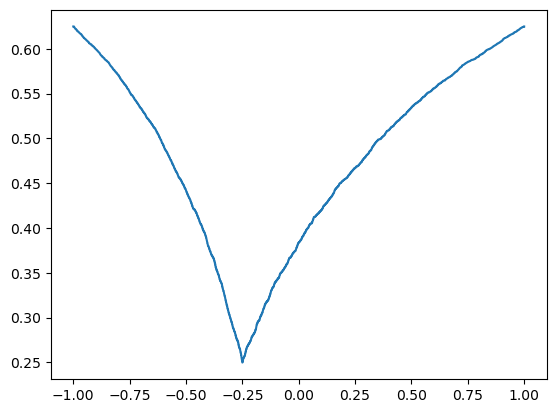

In [35]:
plt.plot(x1_thr, gini_x1)
plt.plot

In [37]:
np.min(gini_x0)

0.4880950095662244

In [38]:
np.min(gini_x1)

0.25

In [42]:
left_ids = X[:, 1] <= -np.min(gini_x1)
right_ids = X[:, 1] > -np.min(gini_x1)

X_left = X[left_ids]
y_left = y[left_ids]

X_right = X[right_ids]
y_right = y[right_ids]

In [43]:
set(y_left)

{2.0}

In [47]:
x0_thr = np.linspace(-1, 1, 10**4)

gini_x0 = []
for thr in x0_thr:
    gini_x0.append(compute_gini(X_right, y_right, 0, thr))
gini_x0 = np.array(gini_x0)

C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:15: RuntimeWarning: invalid value encountered in long_scalars
  p0_satisfy = cnt_satisfy_class0 / cnt_satisfy
C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:16: RuntimeWarning: invalid value encountered in long_scalars
  p1_satisfy = cnt_satisfy_class1 / cnt_satisfy
C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:17: RuntimeWarning: invalid value encountered in long_scalars
  p2_satisfy = cnt_satisfy_class2 / cnt_satisfy
C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:19: RuntimeWarning: invalid value encountered in long_scalars
  p0_dissatisfy = cnt_dissatisfy_class0 / cnt_dissatisfy
C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:20: RuntimeWarning: invalid value encountered in long_scalars
  p1_dissatisfy = cnt_dissatisfy_class1 / cnt_dissatisfy
C:\Users\Sirius\AppData\Local\Temp\ipykernel_16484\3791460248.py:21: RuntimeWarning: invalid value encounte

In [48]:
gini_x0[gini_x0 != gini_x0] = np.max(gini_x0[gini_x0 == gini_x0])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

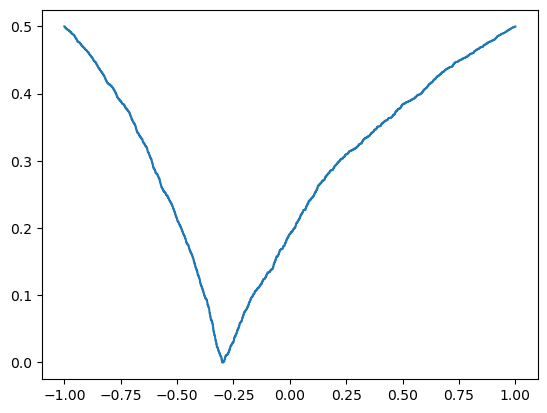

In [49]:
plt.plot(x0_thr, gini_x0)
plt.plot

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)

DecisionTreeClassifier()

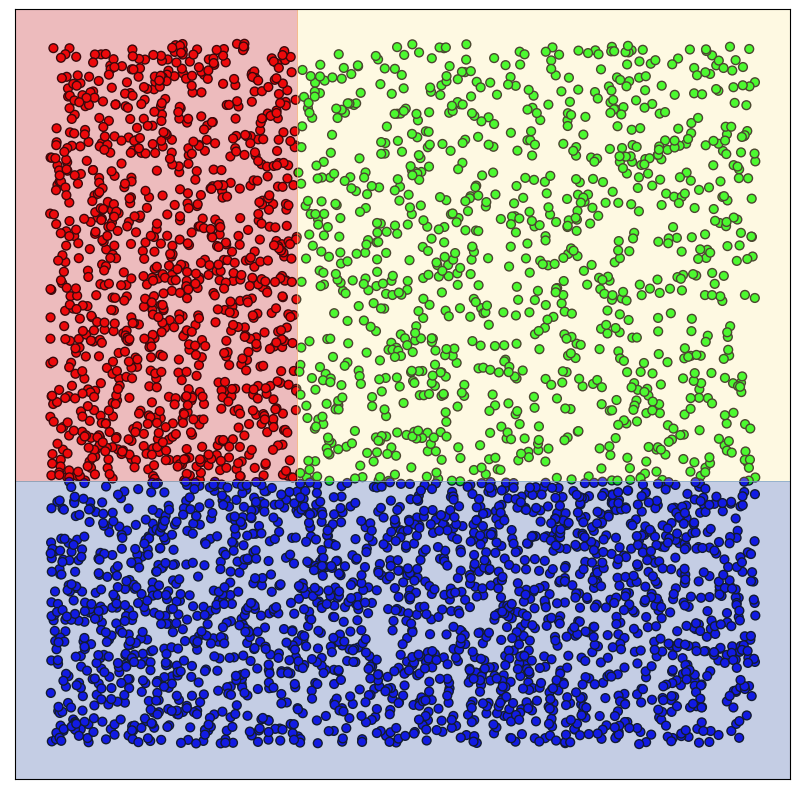

In [54]:
plot_separating_surface(X, y, decision_tree)

In [55]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'X[1] <= -0.25\ngini = 0.625\nsamples = 4000\nvalue = [1000, 1000, 2000]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2000\nvalue = [0, 0, 2000]'),
 Text(0.6, 0.5, 'X[0] <= -0.298\ngini = 0.5\nsamples = 2000\nvalue = [1000, 1000, 0]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1000\nvalue = [1000, 0, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1000\nvalue = [0, 1000, 0]')]

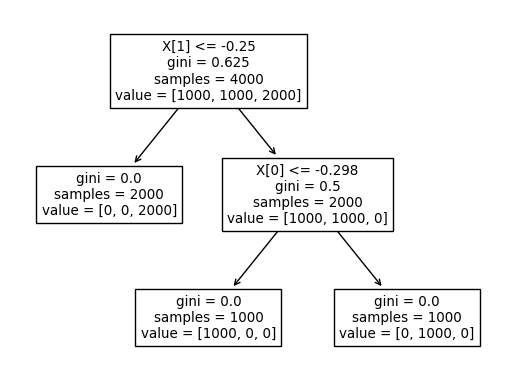

In [56]:
plot_tree(decision_tree)

In [57]:
from sklearn.datasets import make_moons

In [59]:
X, y = make_moons(n_samples=1000, noise=0.1)

In [60]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

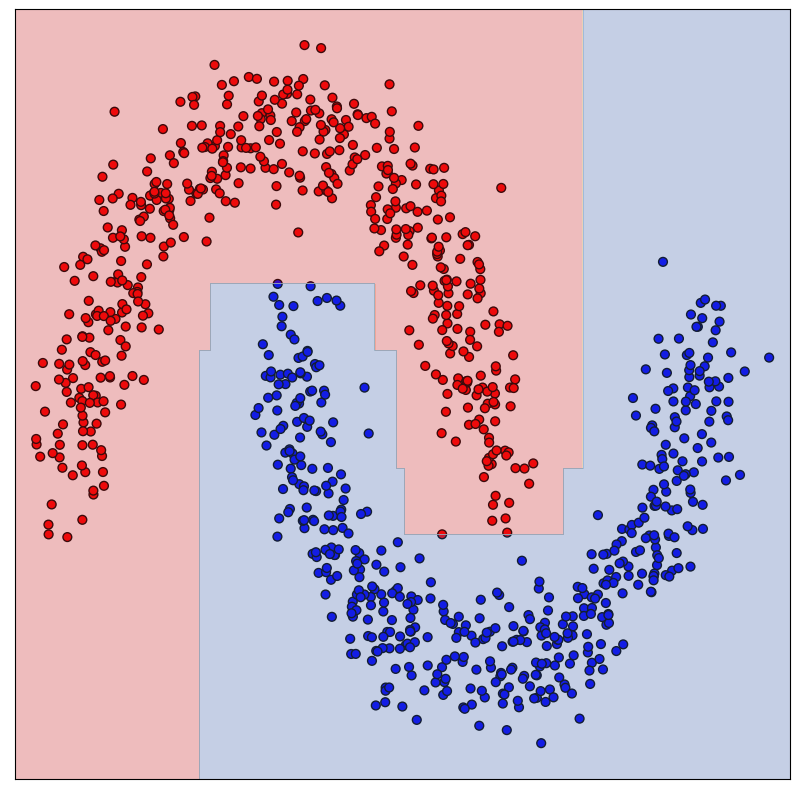

In [61]:
plot_separating_surface(X, y,dt )